# Home Alarm CLV

Prepare "Home Alarm, Inc.: Assessing Customer Lifetime Value" for class discussion and as an individual assignment and submit the assignment through GitLab. Be VERY clear about where results are coming from and what assumptions you are making in your Python code. It is in your best interest that we do not have to struggle to figure out where your numbers came from. The assignment (pdf) is on Canvas (week2/homealarm-clv.pdf). Example Excel calculations are also on Canvas (week1/aws-clv.xlsx and week1/notflix-cls.xlsx).

## Setup

Use this Jupyter notebook to calculate the CLV for a customer that uses auto-pay and for a customer that does not use auto-pay and answer question 1 through 4 in the assignment PDF.

## Hints

Add text motivating your work in Markdown format. Markdown is a simple formatting syntax for authoring HTML. For more details on using markdown go to http://commonmark.org/help/ for a 10-minute interactive Markdown tutorial

Please generate an HTML (Notebook) with your answers to all the questions listed in the homealarm-clv.pdf file on Canvas. When you have finished editing the jupyter notebook and generated the HTML report make sure to save, commit, and push to GitLab. We will collect all files from GitLab after the due date.

Use File > Export Notebook As... > Export Notebook to HTML to get the html report and include the jupyter notebook file and the HTML file in your submission.

## Analysis

The python dictionary below contains information about attrition notifications from the table on page 3 of the assignment PDF.

Note: GitLab will automatically tests if your work is fully reproducible each time to "push" changes (see .gitlab-ci.yml for the configuration). If you get an email from GitLab stating that there was an error, it suggests a problem in your code. Note that the setup for the Home Alarm assignment will *not* test if your analysis is correct. Only if the code is valid and runs without issue in the docker container.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [223]:
churn = pd.DataFrame(
    {
        "autopay": [0.032, 0.070, 0.097, 0.103, 0.095, 0.078, 0.069, 0.059, 0.053],
        "no_autopay": [0.084, 0.122, 0.162, 0.154, 0.134, 0.120, 0.111, 0.096, 0.086],
    }
)

### Create a new DataFrame `churn8` that has the churn values to use for the rest of the caculations

In [183]:
month = np.arange(1, 109, 1)
time = np.arange(13, 109, 1)
#month

In [170]:
# Monthly general increase rate

general_rate = [1] * 12
pre_rate = 1
for i in range(8):
    rate = pre_rate * 1.03
    for j in range(12):
        general_rate = general_rate + [rate]
    pre_rate = rate
general_rate = general_rate

#len(general_rate)
#general_rate

In [131]:

churn8 = pd.DataFrame({'month':month,
                       'general_rate':general_rate}
                     )


### List assumptions that apply to both autopay and non-autopay customers

In [292]:
# list your assumptions here
monthly_revenue = [i * 40 for i in general_rate]
annual_growth = 0.03
annual_discount_rate = 0.1


#monthly_discount_rate = []
#for i in range(1,10):
#    annual_discount_rate = 1.1 ** i - 1
#    #print(annual_discount_rate)
#    discount_rate = [(annual_discount_rate + 1)**(1/12) - 1]
#    print(discount_rate)
#    for j in range(12):
#        #print('test')
#        monthly_discount_rate = monthly_discount_rate + discount_rate

        
monthly_discount_rate = (annual_discount_rate + 1)**(1/12) - 1
#monthly_discount_rate = annual_discount_rate/12

cost_service = [i * 0.15 for i in monthly_revenue]
marketing_cost = [i * 0.05 for i in monthly_revenue]
nr_years = 9

#monthly_discount_rate

In [293]:
churn8['monthly_revenue'] = [''] * 108
churn8['monthly_revenue'] = monthly_revenue
churn8['cost_service'] = [''] * 108
churn8['cost_service'] = cost_service
churn8['marketing_cost'] = [''] * 108
churn8['marketing_cost'] = marketing_cost
churn8['monthly_discount_rate'] = [''] * 108
churn8['monthly_discount_rate'] = monthly_discount_rate

In [294]:
churn8

,month,general_rate,monthly_revenue,cost_service,marketing_cost,monthly_discount_rate
0,1,1.00000,40.000000,6.00000,2.00000,0.007974
1,2,1.00000,40.000000,6.00000,2.00000,0.007974
2,3,1.00000,40.000000,6.00000,2.00000,0.007974
3,4,1.00000,40.000000,6.00000,2.00000,0.007974
4,5,1.00000,40.000000,6.00000,2.00000,0.007974
...,...,...,...,...,...,...
103,104,1.26677,50.670803,7.60062,2.53354,0.007974
104,105,1.26677,50.670803,7.60062,2.53354,0.007974
105,106,1.26677,50.670803,7.60062,2.53354,0.007974
106,107,1.26677,50.670803,7.60062,2.53354,0.007974


In [295]:
# Churn 9 is churn 8 without first 12 rows

churn9 = churn8.iloc[12:,].reset_index().drop(['index'], axis = 1)
churn9

,month,general_rate,monthly_revenue,cost_service,marketing_cost,monthly_discount_rate
0,13,1.03000,41.200000,6.18000,2.06000,0.007974
1,14,1.03000,41.200000,6.18000,2.06000,0.007974
2,15,1.03000,41.200000,6.18000,2.06000,0.007974
3,16,1.03000,41.200000,6.18000,2.06000,0.007974
4,17,1.03000,41.200000,6.18000,2.06000,0.007974
...,...,...,...,...,...,...
91,104,1.26677,50.670803,7.60062,2.53354,0.007974
92,105,1.26677,50.670803,7.60062,2.53354,0.007974
93,106,1.26677,50.670803,7.60062,2.53354,0.007974
94,107,1.26677,50.670803,7.60062,2.53354,0.007974


### Calculate CLV for non-autopay customers

In [296]:
# create an array with shape (96,) with retention rates 
# _nap stands for 'non-autopay'
retention_nap = []
retention_pre = 1
for i in churn.no_autopay[:-1]:
    retention = (1 - i) * retention_pre
    #print(retention)
    for i in range(12):
        retention_nap = retention_nap + [retention]
    retention_pre = retention
    #print(retention_pre)
    
    

retention_nap
len(retention_nap)

96

In [297]:
# calculate clv here
# you can define additional variables as needed, however 
# you **must** use the variables below and define them appropriately
# each of the variables defined below must have shape (96,)
# the clv_nap variable will show the CLV value if evaluated at
# month 1, 2, ..., 96

revenues_nap = churn9.monthly_revenue 
service_nap = revenues_nap * 0.15
marketing_nap = revenues_nap * 0.05
profit_nap = revenues_nap - service_nap - marketing_nap
expected_profit_nap = profit_nap * retention_nap
discount_month_number = np.arange(1,97,1)
pv_expected_profit_nap = expected_profit_nap/(1 + churn9.monthly_discount_rate)**discount_month_number # present value of expected profits

clv_nap = []
nxt = 0
for i in pv_expected_profit_nap:
    clv = i + nxt
    nxt = clv
    clv_nap = clv_nap + [clv]

### Calculate CLV for autopay customers

In [298]:
# create an array with shape (96,) with retention rates 
# _ap stands for 'autopay'

retention_ap = []
retention_pre = 1
for i in churn.autopay[:-1]:
    retention = (1 - i) * retention_pre
    #print(retention)
    for i in range(12):
        retention_ap = retention_ap + [retention]
    retention_pre = retention
    #print(retention_pre)
    
#retention_nap
len(retention_nap)

96

In [299]:
# calculate clv here
# you can define additional variables as needed, however 
# you **must** use the variables below and define them appropriately
# each of the variables defined below must have shape (96,)
# the clv_ap variable will show the CLV value if evaluated at
# month 1, 2, ..., 96

revenues_ap = churn9.monthly_revenue 
service_ap = revenues_ap * 0.15
marketing_ap = revenues_ap * 0.05
profit_ap = revenues_ap - service_ap - marketing_ap
expected_profit_ap = profit_ap * retention_ap
discount_month_number = np.arange(1,97,1)
pv_expected_profit_ap = expected_profit_ap/(1 + churn9.monthly_discount_rate)**discount_month_number # present value of expected profits


clv_ap = []
nxt = 0
for i in pv_expected_profit_ap:
    clv = i + nxt
    nxt = clv
    clv_ap = clv_ap + [clv]

In [300]:
homealarm = pd.DataFrame(
    {"Time": time, "autopay": clv_ap, "no_autopay": clv_nap}
)
homealarm

,Time,autopay,no_autopay
0,13,31.652876,29.952514
1,14,63.055343,59.668073
2,15,94.209385,89.148550
3,16,125.116964,118.395805
4,17,155.780032,147.411684
...,...,...,...
91,104,1757.516233,1439.174441
92,105,1767.839372,1445.937289
93,106,1778.080844,1452.646635
94,107,1788.241295,1459.302903


### Create a line graph of CLV for both autopay and non-autopay customers 

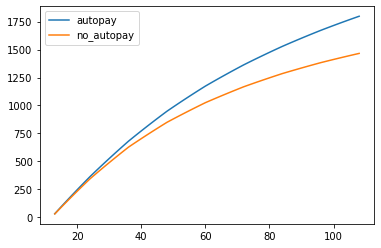

In [301]:
# enter your code here to create a single plot with 2-lines
plt.plot(homealarm.Time, homealarm.autopay, label = 'autopay')
plt.plot(homealarm.Time, homealarm.no_autopay, label = 'no_autopay')
plt.legend()
plt.show()

### Create a line graph of the retention rate for both autopay and non-autopay customer 

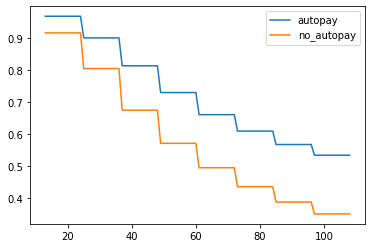

In [302]:
# enter your code here to create a single plot with 2-lines
plt.plot(homealarm.Time, retention_ap, label = 'autopay')
plt.plot(homealarm.Time, retention_nap, label = 'no_autopay')
plt.legend()
plt.show()

### Calculate the maximum amount to spend on autopay incentives

In [308]:
max_pay = clv_ap[-1] - clv_nap[-1] # insert your code here
print(f"Maxium amount to spend on autopay incentives is {round(max_pay, 2)}")

Maxium amount to spend on autopay incentives is 332.41


### Suggested marketing actions

Suggest two marketing actions Home Alarm should consider to convert existing customers to autopay who are about to start their second year with Home Alarm. Be specific about incentive amounts you recommend using (if any)

... enter suggested marketing actions here ...

#### 1. Home Alarm could give lower discount rate to customers who are willing to switch from non-autopay to autopay, as the range of rate changes does not exceed 9 years compounded of 332.41 dollars.

#### 2. Home Alarm coule give free update to home security divices for those who want/would swtich, for which the upgrade cost should not exceed 332.41 dollars.